In [107]:
import numpy as np
import wave
from scipy.io import wavfile
from scipy.fftpack import fft, ifft, dct, idct
import random

In [108]:
fs, data = wavfile.read("sound81.wav")

In [109]:
z = data[:,1]
N = len(z)
L = [i for i in range(0,N,200)]

In [110]:
len(L)

52

In [111]:
def modified_dft(x,N):
    x_mod = []
    for l in L:
        y = [0]*N
        for i in range(int(((N-l-1)/2))+ 1):
            y[i] = x[i]
        for j in range(int((N+l+1)/2),N):
            y[j] = x[j]
        x_mod.append(y)
    return x_mod

In [112]:
def modified_dct(x, N):
    x_mod = []
    for l in L:
        y = [0]*N
        for i in range(N-l):
            y[i] = x[i]
        x_mod.append(y)
    return x_mod

In [113]:
z_dct = dct(z, norm = 'ortho')
mod_dct = modified_dct(z_dct,N)
mod_idct = []
for j in range(52):
    mod_idct.append(idct(mod_dct[j],norm = 'ortho'))


In [114]:
z_dft = fft(z)
mod_dft = modified_dft(z_dft,N)
mod_idft = []
for j in range(52):
    mod_idft.append(ifft(mod_dft[j]))
#Energy Compaction in DFT

In [115]:
e_dct = []
for i in range(52):
    e_dct.append((np.sum(abs(np.array(z)-np.array(mod_idct[i]))**2)) / N)

In [116]:
e_dft = []
for i in range(52):
    e_dft.append((np.sum(abs(np.array(z)-np.array(mod_idft[i]))**2)) / N)


In [117]:
import matplotlib.pyplot as plt

In [118]:
b = []
for i in range(1,52):
    b.append(16 * float(N - L[i])/L[i])

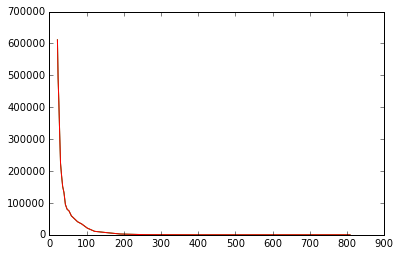

In [119]:
plt.plot(b[0:22],e_dct[1:23],'g')
plt.plot(b[0:22],e_dft[1:23], 'r')
plt.show()

In [120]:
e_dct

[5.1293281710143179e-13,
 7.2207787819444933,
 25.59149606540111,
 398.40656734847744,
 2485.8548554052272,
 7417.9176490031268,
 10869.972318497797,
 20995.046522657853,
 33765.808460282955,
 40944.751091504913,
 51178.335376009876,
 59464.71611642986,
 74774.522951496518,
 80346.872597018126,
 95089.634882442464,
 133174.72455286444,
 151569.55434306705,
 187017.09305946797,
 224421.51484424662,
 322641.89649286924,
 418421.69134625862,
 491415.17958803894,
 611675.14998885058,
 691813.33216495044,
 837053.15419574978,
 894038.72655356559,
 973080.46549936896,
 1060500.3270270869,
 1120575.4874238623,
 1226046.3340367379,
 1419814.231830461,
 1705157.728615561,
 1937173.3756353564,
 2008069.7851032687,
 2161867.0268258303,
 2467403.7064118083,
 2844316.2667836538,
 3751488.6823644657,
 3904847.8838635143,
 4042622.4826193564,
 4111080.3355966983,
 4194105.7185784844,
 4218681.0603972124,
 4248734.888770137,
 4263706.2116007619,
 4268307.8628223576,
 4273340.8390599107,
 4274969.72896

In [121]:
e_dft

[1.74135272296791e-13,
 7.2577360369812807,
 25.627477866649318,
 397.44145908975884,
 2481.1032403753579,
 7401.0823513100113,
 10888.850605596952,
 20951.479844191217,
 33748.606728082828,
 40959.742757254513,
 51127.707404296634,
 59462.733066695844,
 74799.449144775572,
 80339.25754161946,
 95038.431332143271,
 133083.08494613989,
 151546.19055504628,
 187021.13356037834,
 224349.20136384192,
 322612.43589868071,
 417968.90174771671,
 491269.40327373735,
 611254.74218290008,
 691819.37383816589,
 837472.79767941753,
 893126.23932059563,
 973259.34399555821,
 1060281.4325775024,
 1120414.5260837164,
 1226007.9486549739,
 1417727.1355155115,
 1705051.4296972528,
 1935734.8713079605,
 2008015.536395146,
 2161869.6222399087,
 2467319.8073041178,
 2844560.9048769553,
 3747914.5841613258,
 3904753.1300358917,
 4042578.3422026513,
 4111002.5589909372,
 4193713.8567624385,
 4218695.5666879797,
 4248752.3632202167,
 4263664.6945063584,
 4268305.4546610462,
 4273341.4572472079,
 4274969.4424